# Welcome to the tutorial on Histograms

---

### In this document, we'll talk about the following:
- Histograms in Digital Image Processing

## Histograms

Histogram is a graphical display of data using bars of different heights. It represents the distribution of numerical data.
<img float="left" src="./Assets/Histogram.png" style="width: 50%;" alt="Sample Histogram">
<center>Figure 1: Sample Histogram</center>

In digital image processing, the histogram is used for graphical representation of a digital image.   
In this graph, the horizontal axis of the graph is used to represent tonal variations whereas the vertical axis is used to represent the number of pixels in that particular tone.   
Nowadays, image histogram is present in digital cameras. Photographers use them to see the distribution of tones captured.   
Black and dark areas are represented in the left side of the horizontal axis, medium grey color is represented in the middle, and the vertical axis represents the size of the area.  
<img float="left" src="./Assets/Scenery.jpg" style="width: 50%;">
<center>Figure 2: Scenery</center>

### Some important terminology
**1. BINS**: BINS refer to the number of elements we want on the X axis of the histogram   
**2. DIMS**: It is the number of parameters for which we collect the data.   
**3. RANGE**: It is the range of intensity values you want to measure. Normally, it is [0, 256], i.e. all intensity values.

Let's see if we can generate the histogram of the grayscale image of the above scenery.

We begin by importing the important packages and the image itself in **Grayscale** since we want to view the intensities of the various pixels.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('./Assets/Scenery.jpg', 0)
img.shape

(427, 640)

Let's create a function which will helps us easily display the images.

In [3]:
def plotter(org_img, new_img, axis='off'):
    fig=plt.figure(figsize=(15,7))
    rows = 1
    columns = 2

    fig.add_subplot(rows, columns, 1)
    plt.imshow(org_img, cmap='gray'); plt.axis(axis); plt.title("Original");

    fig.add_subplot(rows, columns, 2)
    plt.imshow(new_img, cmap='gray'); plt.axis(axis); plt.title("After Operation");

---
## Generate Histogram

### Using NumPy

#### `np.histogram(src [, bins=10, range=None, weights=None, density=None])`
This method loads an image from the specified file as a NumPy array(we will learn about this soon!) with each cell as a pixel.
##### Parameters
**src** : the source image  
**bins(optional)** : this represents our BIN count.  
**ranges(optional)** : The lower and upper range of the bins  
**weights(optional)** : An array of weights, of the same shape as a.     
**normed(optional)** : *bool* If True, the result is the value of the probability density function at the bin, normalized such that the integral over the range is 1. If False, the result will contain the number of samples in each bin.    
##### Returns
- **hist**: The values of the histogram
- **bin_edges**: (length(hist)+1)

#### `ndarray.ravel()`
Returns a flattened array

In [4]:
a = np.resize(np.arange(32), (4,4,2))
print("A's shape = ",a.shape)
print("After ravel shape = ", (a.ravel()).shape)

A's shape =  (4, 4, 2)
After ravel shape =  (32,)


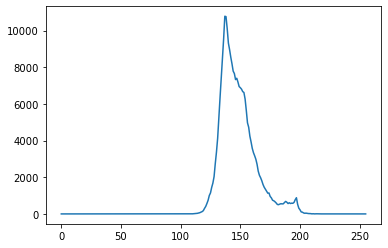

In [5]:
hist, bins = np.histogram(img.ravel(),256,[0,256])

plt.plot(hist);

### Using OpenCV
We use `cv2.calcHist()` function to get the histogram of the `img` NumPy array.

#### `cv2.calcHist(src, channels, mask, histSize, ranges, [accumulate ])`
##### Parameters
**src** : it is the source image  
**channels** : it is also given in square brackets. It is the index of channel for which we calculate histogram  
**mask** : mask image. To find histogram of full image, it is given as "None"   
**histSize** : this represents our BIN count. Need to be given in square brackets  
**ranges** : this is our RANGE. Normally, it is [0,256]    
**accumulate (optional)**: *bool* This flag enables you to compute a single histogram from several sets of arrays. If it is set, the histogram is not cleared in the beginning when it is allocated   
##### Returns
This method returns an image that is loaded from the specified file.


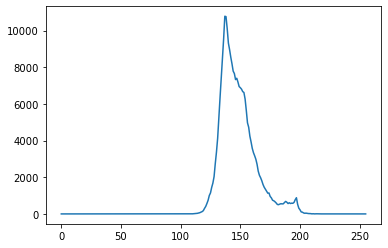

In [6]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])

plt.plot(hist);

### Using Matplotlib

Matplotlib comes with a histogram plotting function `pyplot.hist()`

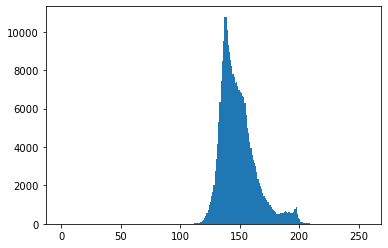

In [7]:
plt.hist(img.ravel(),256,[0,256])
plt.show()

---
## Histogram Equalization
Histogram Equalization is a method in image processing of contrast adjustment using the image's histogram.

### Using NumPy

#### `np.cumsum(src [, axis=None, dtype=None, out=None ])`
##### Parameters
**src** : it is the source image  
**axis(optional)** : axis along which the cumulative sum is computed  
**dtype(optional)** : Type of the returned array and of the accumulator in which the elements are summed   
##### Returns
Return the cumulative sum of the elements along a given axis

#### `np.interp(x, xp, fp [,left=None, right=None, period=None])`
Computes One-dimensional linear interpolation
##### Parameters
**x** : The x-coordinates at which to evaluate the interpolated values   
**xp** : The x-coordinates of the data points  
**fp** : The y-coordinates of the data points, same length as xp  
**left(optional)** : Value to return for x < xp\[0\]  
**right(optional)** : Value to return for x > xp\[-1\]  
**period(optional)** : A period for the x-coordinates 
##### Returns
Returns the one-dimensional piecewise linear interpolant to a function with given discrete data points (xp, fp), evaluated at x

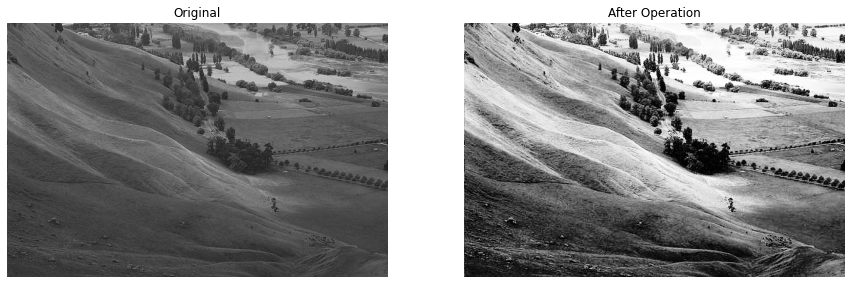

In [8]:
def histogram_equalization(image):
    image_histogram, bins = np.histogram(img.ravel(),256, density=True)
    
    cdf = image_histogram.cumsum()
    cdf = 255 * cdf / cdf[-1]

    # use linear interpolation of cdf to find new pixel values
    image_equalized = np.interp(image.flatten(), bins[:-1], cdf)

    return image_equalized.reshape(image.shape)

equ_np = histogram_equalization(img)
plotter(img, equ_np)

### Using OpenCV

#### `cv2.equalizeHist(src)`
The function normalizes the brightness and increases the contrast of the image.
##### Parameters
**src** : it is the source image   
##### Returns
This method returns the histogram equalized image

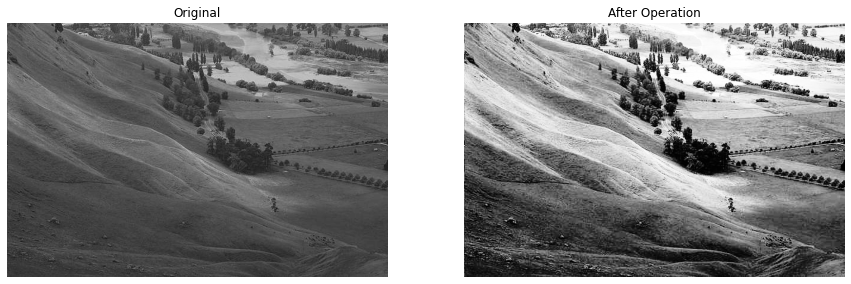

In [9]:
equ_cv = cv2.equalizeHist(img)

plotter(img, equ_cv)

## Contrast Limited Adaptive Histogram Equalization (CLAHE)

The above histogram equalization, considers the global contrast of the image. But such equalization can give unwanted results too.   
Let's take an example.

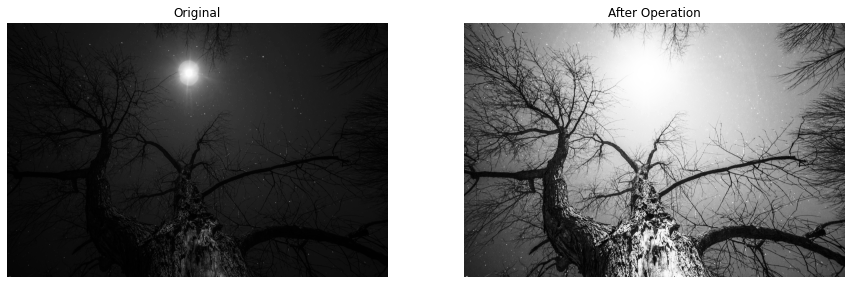

In [10]:
img2 = cv2.imread('./Assets/night_tree.jpg', 0)
equ = cv2.equalizeHist(img2)

plotter(img2, equ)

In the above situation, a lot of details have been brought to light by equalizing but we have lost some info too.
- We lost the light source at the top center.
- The image is too bright.

We have a solution to this problem which is **Contrast Limited Adaptive Histogram Equalization** or **CLAHE**.

#### `cv2.createCLAHE( [clipLimit = 40.0, tileGridSize = (8, 8)] )`
The function normalizes the brightness and increases the contrast of the image.
##### Parameters
**clipLimit(optional)** : Threshold for contrast limiting   
**tileGridSize(optional)** : Size of grid for histogram equalization   
##### Returns
Creates an object of `cv2.CLAHE` class.  
*The `.apply(img)` function can be used on this object which Equalizes the histogram in the given `img`*.

In [11]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img2)

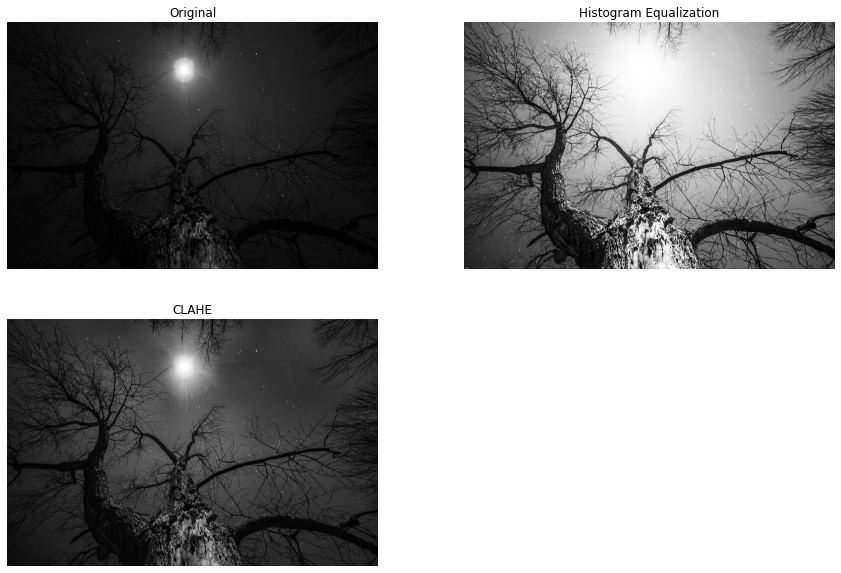

In [12]:
fig=plt.figure(figsize=(15,10))
rows = 2
columns = 2
axis = 'off'

fig.add_subplot(rows, columns, 1)
plt.imshow(img2, cmap='gray'); plt.axis(axis); plt.title("Original");

fig.add_subplot(rows, columns, 2)
plt.imshow(equ, cmap='gray'); plt.axis(axis); plt.title("Histogram Equalization");

fig.add_subplot(rows, columns, 3)
plt.imshow(cl1, cmap='gray'); plt.axis(axis); plt.title("CLAHE");

Using this technique we were able to:
- Bring up aple details, especially noticebale near the border of the image and the branches
- Still keep the light source in image

## References

| Figures                                                                             | Reference                                                     |
| :---------------------------------------------------------------------------------- | :------------------------------------------------------------ |
| By original Phillip Capper, modified by User:Konstable - modified Hawkes Bay NZ.jpg | https://commons.wikimedia.org/w/index.php?curid=855363        |
| Tree by Isaac                                                                       | https://www.pexels.com/photo/sky-night-dark-branches-3867052/ |